<a href="https://colab.research.google.com/github/jane95924/Direct-Marketing/blob/main/Classification_Direct_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Direct Marketing





##Defining the Question

Goal
- Reduce cost of mailing by targeting a set of consumers likely to buy a new cell-phone product.

Approach:  
- Search and retrieve relevant data from any source of your choice. 
- Select relevant techniques to clean the data (missing values, outliers, wrong data types etc.) - Choose the correct feature selection technique for a classification problem. - Perform feature normalization on the data set. 
- Identify a feature in the data set that indicates if a customer “buys” or “doesn’t buy” a product.  If no feature exists, add it randomly for every customer i.e., {buy, don’t buy}. The decision forms  the class attribute. 
- Collect various demographic, lifestyle, and company interaction related information about all  such customers (i.e., type of business, where they stay, how much they earn, etc.) - Use this information as predictor features to build a classifier model.



##Defining the Metric for Success

Design a model to use customer purchase information data to correctly predict a customer's decision that they would likely purchase a new product.
- The model should have a 65% - 75% accuracy score to predict that a customer will buy the new cell phone thereby enabling the store to target their consumers effectively reducing their cost of mailing.

##Understanding the context

The client in this case is a retailer who seeks to reduce their cost of mailing to potential customers on a new phone product whereby instead of broadcast mailing to all customers, they would like to target potential customers allowing them to reduce mailing costs while improving the sales conversion rate of the targeted mailing compared to broadcast mailing.

##Experimental Design
* Import dataset
* Exploring data 
* Data cleaning 
  > * Check for null values and deal with them
  > * Check for duplicates and deal with them
  > * Check for our outliers and deal with them 
* EDA
> * Univariate analysis
> * Bivariate analysis
> * Multivariate analysis

* Modelling
> * Feature transformation
> * Feature Importance
> * Feature Selection

> Classification models
> * Logistic Regression
> * Support Vector machine (SVM)
> * Decision tree classifier
> * Random forest classifier
>* K - Nearest classifier

* Conclusion
> Challenge the solution

* Recommendation

##Data Relevance


Our dataset has 2240 rows and 28 columns, the dataset has description of the columns is provided. We are looking to solve a marketing problem, to do this we need purchase history and customer data and demographics. Our dataset captures this information and would be able to inform whether one will buy or not buy a phone. Our dataset has few missing values, specifically one column, we fill the nulls to classify accurately. The dataset is accurate and complete. Some of the data types are different but some column data type will be changed for use in modeling and even for analysis and to accurately solve the problem.The column descriptions are as outlined below.


### Data Attributes

* ID: Customer's unique identifier 

* Year_Birth: Customer's birth year

* Education: Customer's education level

* Marital_Status: Customer's marital status

* Income: Customer's yearly household income

* Kidhome: Number of children in customer's household

* Teenhome: Number of teenagers in customer's household

* Dt_Customer: Date of customer's enrollment with the company

* Recency: Number of days since customer's last purchase

* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

* NumDealsPurchases: Number of purchases made with a discount

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* NumWebPurchases: Number of purchases made through the company’s website 

* NumCatalogPurchases: Number of purchases made using a catalogue 

* NumStorePurchases: Number of purchases made directly in stores 

* NumWebVisitsMonth: Number of visits to company’s website in the last month

* MntWines: Amount spent on wine in last 2 years

* MntFruits: Amount spent on fruits in last 2 years

* MntMeatProducts: Amount spent on meat in last 2 years

* MntFishProducts: Amount spent on fish in last 2 years

* MntSweetProducts: Amount spent on sweets in last 2 years

* MntGoldProds: Amount spent on gold in last 2 years

* Buy_Choice: Decision to purchase a product or not


#Import Data


In [ ]:
# Import the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
# Read the data and preview top rows
data =  pd.read_csv("/content/Marketing_data - Sheet1.csv")
data.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buy_Choice
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,2,5,0,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,4,6,0,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,6,5,0,0,0,0,0,0,0,1
5,7446,1967,Master,Together,62513.0,0,1,09/09/2013,16,520,...,10,6,0,0,0,0,0,0,0,1
6,965,1971,Graduation,Divorced,55635.0,0,1,13/11/2012,34,235,...,7,6,0,0,0,0,0,0,0,1
7,6177,1985,PhD,Married,33454.0,1,0,08/05/2013,32,76,...,4,8,0,0,0,0,0,0,0,1
8,4855,1974,PhD,Together,30351.0,1,0,06/06/2013,19,14,...,2,9,0,0,0,0,0,0,1,1
9,5899,1950,PhD,Together,5648.0,1,1,13/03/2014,68,28,...,0,20,1,0,0,0,0,0,0,0


# Exploring data

In [ ]:
#Check the last rows in our dataset
data.tail(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buy_Choice
2225,4749,1968,Graduation,Together,58554.0,1,1,26/09/2012,55,368,...,6,7,0,0,0,0,0,0,0,0
2226,4478,1979,Graduation,Married,63777.0,1,1,24/03/2013,87,457,...,6,8,0,0,0,0,0,0,0,0
2227,4201,1962,Graduation,Single,57967.0,0,1,03/03/2013,39,229,...,8,5,0,0,0,0,0,0,0,0
2228,8720,1978,2n Cycle,Together,NaN,0,0,12/08/2012,53,32,...,1,0,0,1,0,0,0,0,0,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18/05/2014,9,3,...,2,7,0,0,0,0,0,0,0,0
2230,7004,1984,Graduation,Single,11012.0,1,0,16/03/2013,82,24,...,2,9,1,0,0,0,0,0,0,1
2231,9817,1970,Master,Single,44802.0,0,0,21/08/2012,71,853,...,12,8,0,0,0,0,0,0,0,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17/08/2012,50,5,...,3,4,0,0,0,0,0,0,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02/06/2013,23,9,...,3,6,0,0,0,0,0,0,0,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01/07/2013,81,3,...,2,7,0,0,0,0,0,0,0,1


In [ ]:
#Check columns in our data,
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Buy_Choice'],
      dtype='object')

In [ ]:
# Check dimension of our data
data.shape

(2240, 28)

Our data consists of 28 attributes and 2240 rows

In [ ]:
#Check the shape and data types, check columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset has 25 numerical and 3 object variable types

In [ ]:
# Check the statistics description
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buy_Choice
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.393304
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.488592
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above descriptive statistics, we can see that income has a very high standard deviation and given the maximum value for the income compared to the mean as well as the other quartile values, it shows that there could be an outlier.


#Data Cleaning

In [ ]:
# converting "Dt_Customer" to their date time data type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data[['Dt_Customer']].dtypes

Dt_Customer    datetime64[ns]
dtype: object

In [ ]:
# converting "Education" and "Marital Status" to their respective types
data['Education'] = data['Education'].astype('category')
data['Marital_Status'] = data['Marital_Status'].astype('category')
# checking
data[['Education','Marital_Status']].dtypes

Education         category
Marital_Status    category
dtype: object

In [ ]:
#Check for null values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Buy_Choice              0
dtype: int64

There are 24 missing values within the Income attribute. We will replace this with the median income so as not to affect the distribution. 

In [ ]:
# Dealing with null values
# Replaced the null values on the Income with the median of the Income
data['Income'].fillna(data['Income'].median(), inplace=True)
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buy_Choice
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,1
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,10,6,0,0,0,0,0,0,0,1
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,7,6,0,0,0,0,0,0,0,1
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,4,8,0,0,0,0,0,0,0,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,2,9,0,0,0,0,0,0,1,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,20,1,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Buy_Choice             0
dtype: int64

In [ ]:
# Check for duplicates in our dataset
data.duplicated().sum()

0

There are no duplicates in our dataset

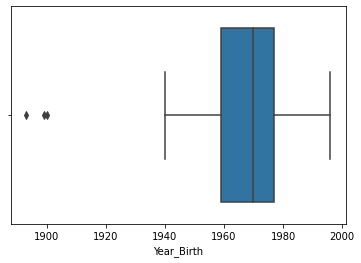

In [ ]:
#check for outliers across each column
sns.boxplot(data = data, x = 'Year_Birth')
#possible outliers in Year of Birth

There is evidence of some outliers within the Year_Birth attribute located before 1940

In [ ]:
# identifying the outliers under 'Year_Birth'
data.loc[data['Year_Birth'] < 1940]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buy_Choice
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,1
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,1
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,0


In [ ]:
print(data['Year_Birth'].mode())
print(data['Year_Birth'].median())


0    1976
dtype: int64
1970.0


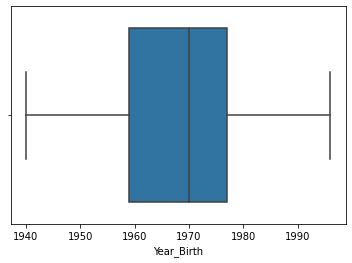

In [ ]:
# replace outlier values under year_birth with the mode
data['Year_Birth']= data['Year_Birth'].replace([1900],1976)
data['Year_Birth']= data['Year_Birth'].replace([1893],1976)
data['Year_Birth']= data['Year_Birth'].replace([1899],1976)
#checking
sns.boxplot(data = data, x = 'Year_Birth')

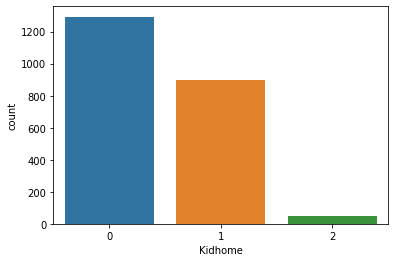

In [ ]:
sns.countplot(data = data, x = 'Kidhome')

Most customers do not have kids in the household. Those that do have only 1.

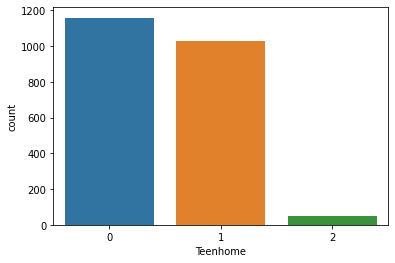

In [ ]:
sns.countplot(data = data, x = 'Teenhome')

Most customers have no teenagers in the household. Those that do have only 1.

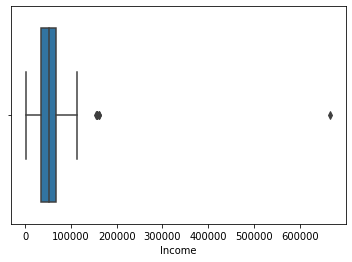

In [ ]:
sns.boxplot(data = data, x = 'Income')
#possible outliers detected within Income column

There is evidence of outliers within the income attribute.

In [ ]:
# identifying the outliers under 'Income'
data.loc[data['Income'] > 100000]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buy_Choice
124,7215,1983,Graduation,Single,101970.0,0,0,2013-12-03,69,722,...,13,2,0,1,1,1,0,0,1,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,...,0,0,0,0,0,0,0,0,0,0
203,2798,1977,PhD,Together,102160.0,0,0,2012-02-11,54,763,...,10,4,0,1,1,1,0,0,1,1
252,10089,1974,Graduation,Divorced,102692.0,0,0,2013-05-04,5,168,...,13,2,0,1,1,1,1,0,1,1
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,...,1,1,0,0,0,0,0,0,0,0
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,...,13,3,0,0,1,1,0,0,1,1
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,...,0,0,0,0,0,0,0,0,0,1
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,...,1,0,0,0,0,0,0,0,0,1
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,...,1,1,0,0,0,0,0,0,0,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,1,0,0,0,0,0,0,0,0


From this we determine only 666666 to be considered an outlier within this attribute as it is widely varied from the rest of the data. 

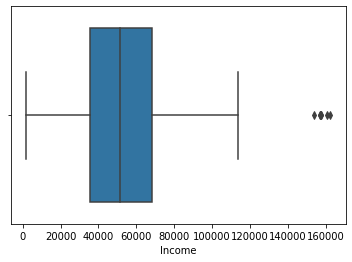

In [ ]:
# based on the above we can consider only the entry for Income '666666.0', the rest are within the general income range.
# we replace the outlier with the median of the income column

data['Income']= data['Income'].replace([666666.0],data['Income'].median())
#checking
sns.boxplot(data = data, x = 'Income')

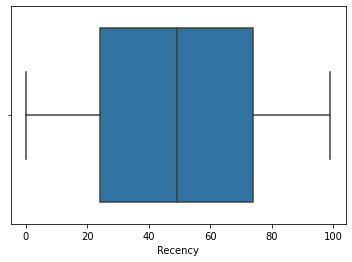

In [ ]:
sns.boxplot(data = data, x = 'Recency')

Most customers last purchased from the store between 20 - 80 days ago

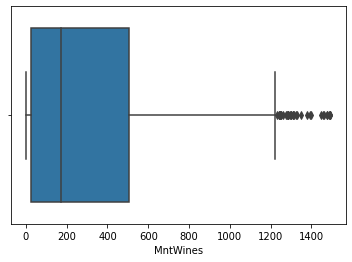

In [ ]:
sns.boxplot(data = data, x = 'MntWines')

Most customers spend less than 600 on Wines

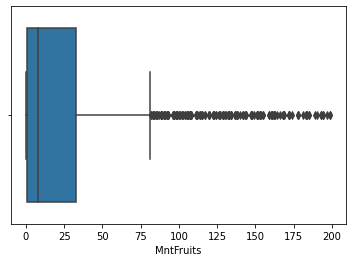

In [ ]:
sns.boxplot(data = data, x = 'MntFruits')

Most customers spend less than 50 on fruits

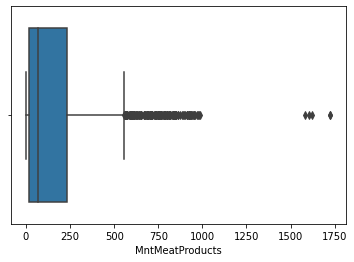

In [ ]:
sns.boxplot(data = data, x = 'MntMeatProducts')

Most customers spend less than 250 on meat products

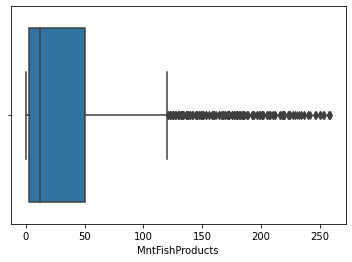

In [ ]:
sns.boxplot(data = data, x = 'MntFishProducts')

Most customers spend less than 50 on fish products

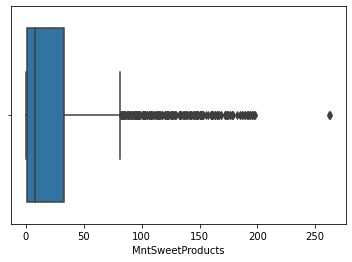

In [ ]:
sns.boxplot(data = data, x = 'MntSweetProducts')

Most customers spend less than 50 on sweet products

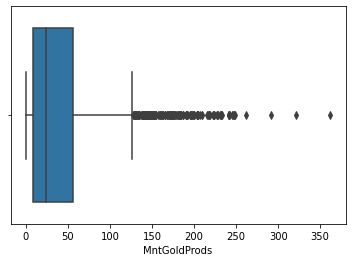

In [ ]:
sns.boxplot(data = data, x = 'MntGoldProds')

Most customers spend 50 or less on gold products

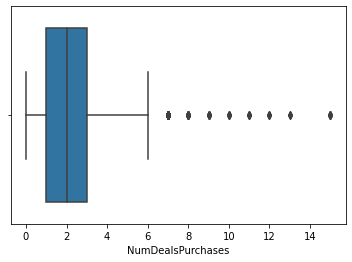

In [ ]:
sns.boxplot(data = data, x = 'NumDealsPurchases')

Most customers made on average two purchases with a discount

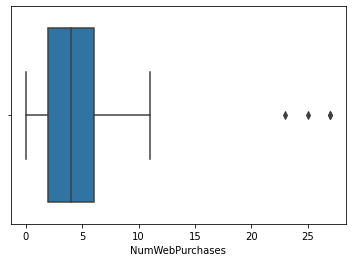

In [ ]:
sns.boxplot(data = data, x = 'NumWebPurchases')

Most customers made on average less than 5 purchases via the store website

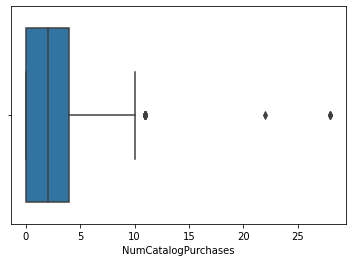

In [ ]:
sns.boxplot(data = data, x = 'NumCatalogPurchases')

Most customers made less than 5 purchases via the catalog

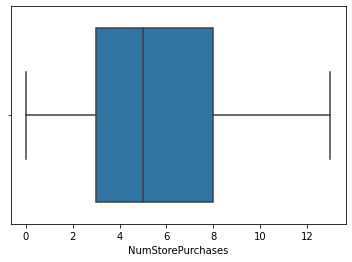

In [ ]:
sns.boxplot(data = data, x = 'NumStorePurchases')

Most customers did less than 8 in-house store purchases

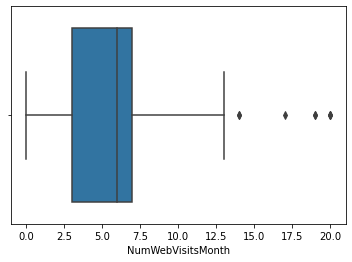

In [ ]:
sns.boxplot(data = data, x = 'NumWebVisitsMonth')

Most customer visited the store website between 2 to 7 times a month

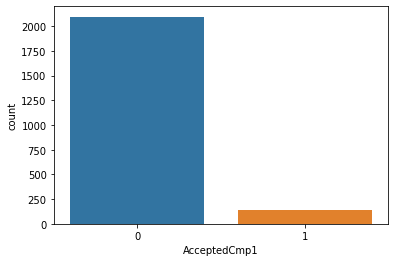

In [ ]:
sns.countplot(data = data, x = 'AcceptedCmp1')

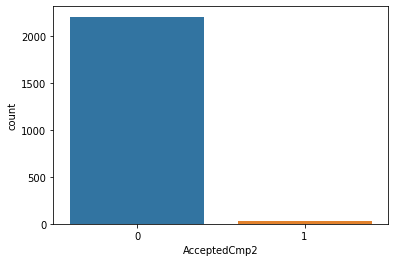

In [ ]:
sns.countplot(data = data, x = 'AcceptedCmp2')

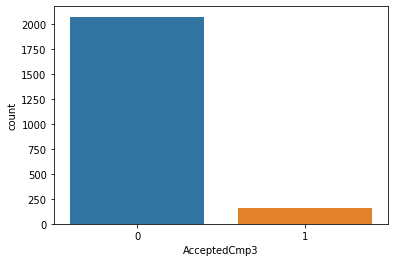

In [ ]:
sns.countplot(data = data, x = 'AcceptedCmp3')

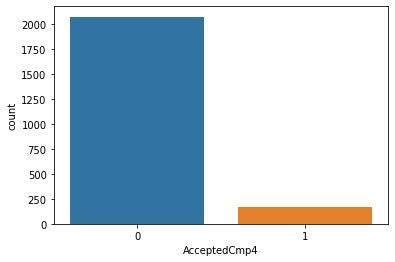

In [ ]:
sns.countplot(data = data, x = 'AcceptedCmp4')

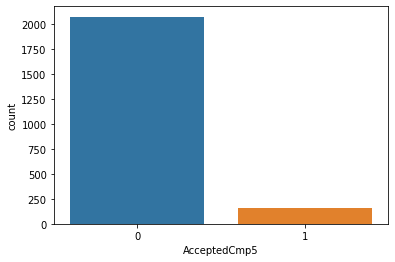

In [ ]:
sns.countplot(data = data, x = 'AcceptedCmp5')

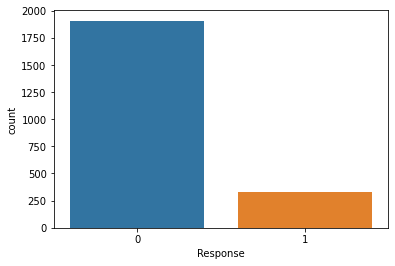

In [ ]:
sns.countplot(data = data, x = 'Response')

Most customers did not accept the offers during their 6 campaigns

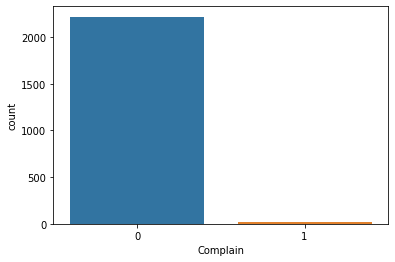

In [ ]:
sns.countplot(data = data, x = 'Complain')

Majority of the customers have not registered a complaint

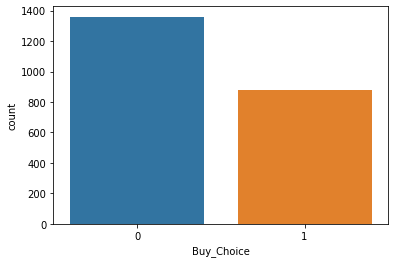

In [ ]:
sns.countplot(data = data, x = 'Buy_Choice')

Majority of the customers did not make the decision to buy the product 

In [ ]:
# Exporting our cleaned dataset into a csv

data.to_csv("Marketing_data_clean.csv")


#EDA

In [ ]:
#Loading our cleaned data into a dataframe

data_1 =  pd.read_csv("/content/Marketing_data_clean.csv")
data_1.head(15)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Buy_Choice
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,...,4,7,0,0,0,0,0,0,1,0
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,...,2,5,0,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,10,4,0,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,...,4,6,0,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,6,5,0,0,0,0,0,0,0,1
5,5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,...,10,6,0,0,0,0,0,0,0,1
6,6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,...,7,6,0,0,0,0,0,0,0,1
7,7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,...,4,8,0,0,0,0,0,0,0,1
8,8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,...,2,9,0,0,0,0,0,0,1,1
9,9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,...,0,20,1,0,0,0,0,0,0,0


In [ ]:
!pip install sweetviz
import sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 2.1 MB/s 


In [ ]:
my_report = sweetviz.analyze(data_1,target_feat='Buy_Choice')


                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 2.0 MB/s 
     |████████████████████████████████| 101 kB 10.3 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 56.4 MB/s 
     |████████████████████████████████| 749 kB 66.6 MB/s 
     |████████████████████████████████| 28.5 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 61.4 MB/s 
     |████████████████████████████████| 133 kB 71.8 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 965 kB 50.0 MB/s 
     |████████████████████████████████| 96 kB 6.5 MB/s 
     |████████████████████████████████| 232 kB 71.8 MB/s 
     |████████████████████████████████| 1.6 MB 47.8 MB/s 
     |██████████████████████


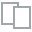
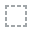
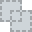
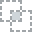
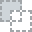
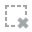
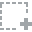
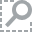
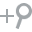
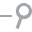
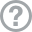
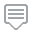
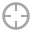
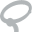
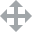
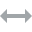
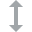
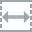
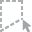
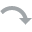
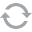
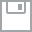
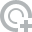
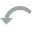
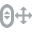
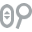
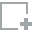
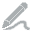
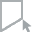
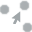
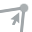
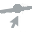

In [ ]:
!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(data_1)

Text(0.5, 1.0, 'n_uniques = 5 \n value counts \n Graduation    0.503125\nPhD           0.216964\nMaster        0.165179\n2n Cycle      0.090625\nBasic         0.024107\nName: Education, dtype: float64;')

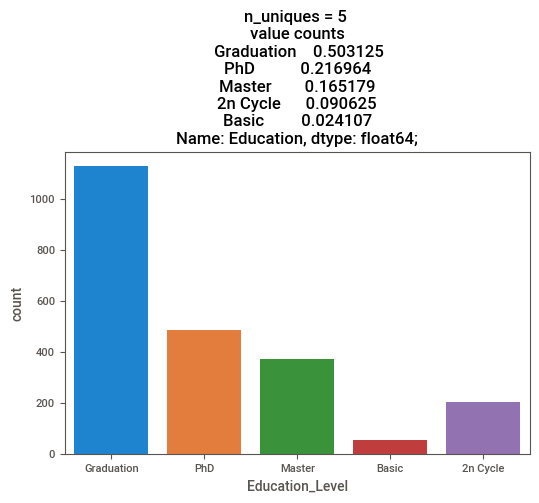

In [ ]:
#CountPlot for Education Level

# Count Values to display on the chart
norm_count = data_1['Education'].value_counts(normalize = True)
n_uni = data_1['Education'].nunique()

#Display Chart
sns.countplot(x = data_1['Education']);
#Display Labels
plt.xlabel('Education_Level',fontweight='bold')
plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))


* 50% of the customers are graduates of a basic degree
* Over 87% of our customers have graduated from a University with atleast a basic degree
* Least is 'Basic' at 2% 

Text(0.5, 1.0, 'n_uniques = 8 \n value counts \n Married     0.385714\nTogether    0.258929\nSingle      0.214286\nDivorced    0.103571\nWidow       0.034375\nAlone       0.001339\nAbsurd      0.000893\nYOLO        0.000893\nName: Marital_Status, dtype: float64;')

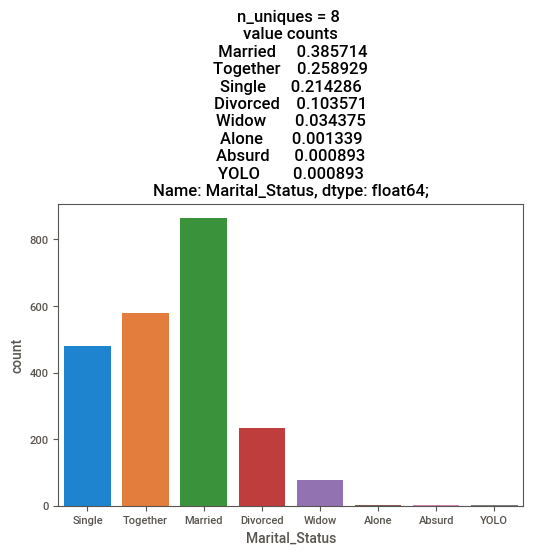

In [ ]:
#CountPlot for Marital_Status

# Count Values to display on the chart
norm_count = data_1['Marital_Status'].value_counts(normalize = True)
n_uni = data_1['Marital_Status'].nunique()

#Display Chart

sns.countplot(x = data_1['Marital_Status']);
#Display Labels
plt.xlabel('Marital_Status',fontweight='bold')
plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))



* Most Customers are married at 39%, followed by those living together at 26% and single at 21%
* Absurd and YOLO jointly each at 0.09% contain the fewest number of customers

Text(0.5, 1.0, 'n_uniques = 2 \n value counts \n 0    0.606696\n1    0.393304\nName: Buy_Choice, dtype: float64;')

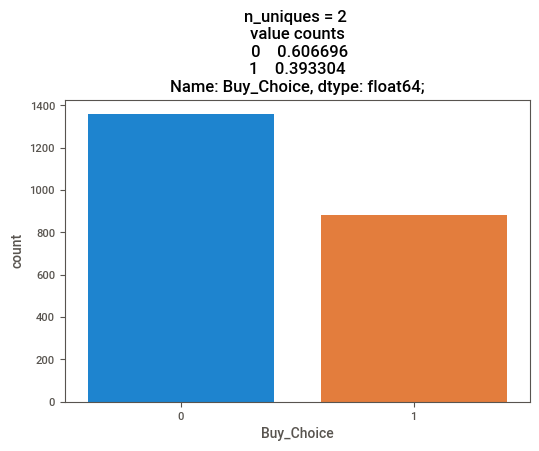

In [ ]:
#CountPlot for Buy_Choice

# Count Values to display on the chart
norm_count = data_1['Buy_Choice'].value_counts(normalize = True)
n_uni = data_1['Buy_Choice'].nunique()

#Display Chart

sns.countplot(x = data_1['Buy_Choice']);
#Display Labels
plt.xlabel('Buy_Choice',fontweight='bold')
plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))


* Most Customers did not purchase phones  at 60%

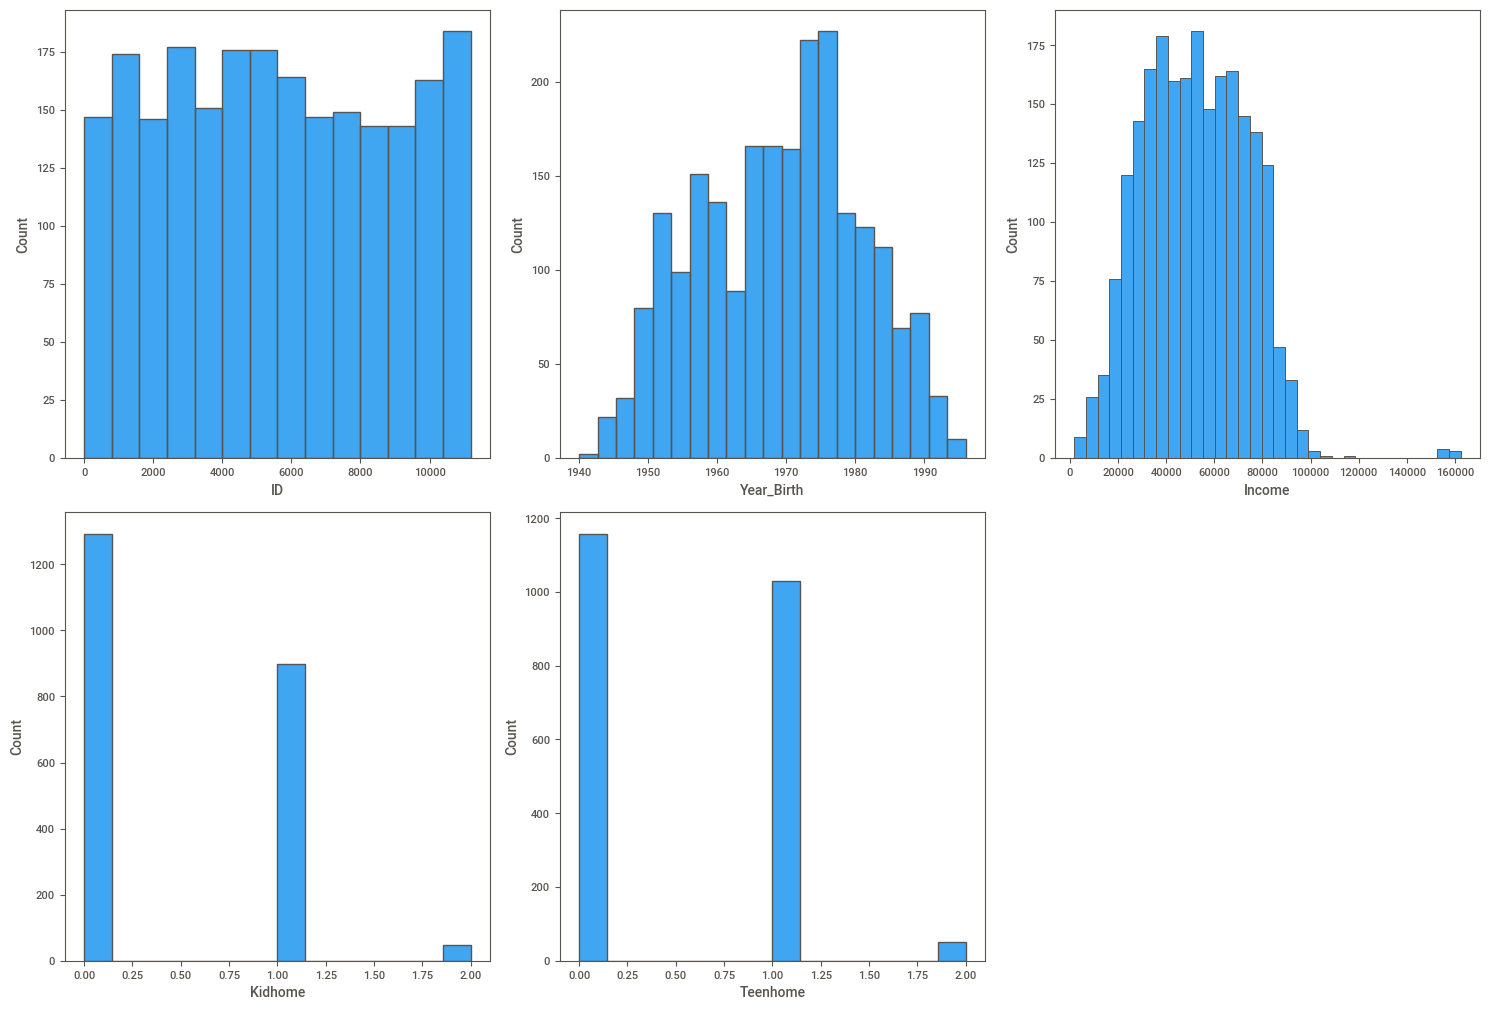

In [ ]:
_# Histogram plots of  Customer Details

cols = 3
rows = 9

#create df of numeric features only.
df1 = data_1[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome']]
num_cols = df1.select_dtypes(exclude='object')

#Size of figure
fig=plt.figure(figsize=(cols*5, rows*5))

#enumerate adds a counter as you
#iterate over each column
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1,)
    
    sns.histplot(x = data_1[col], ax = ax)
    
fig.tight_layout()  
plt.show()


* ID variable is unique for every customer, Hence uniform distribution. 
* Year_Birth: Varies from 1940 to 1996. Mode is 1976
* Most Customers education level is 'Graduation' and leasr is 'Basic'
* Most Customers are married
* Max Income is approx 160,000
* Most Families have 0 children as seen in Kidhome and Teen Home

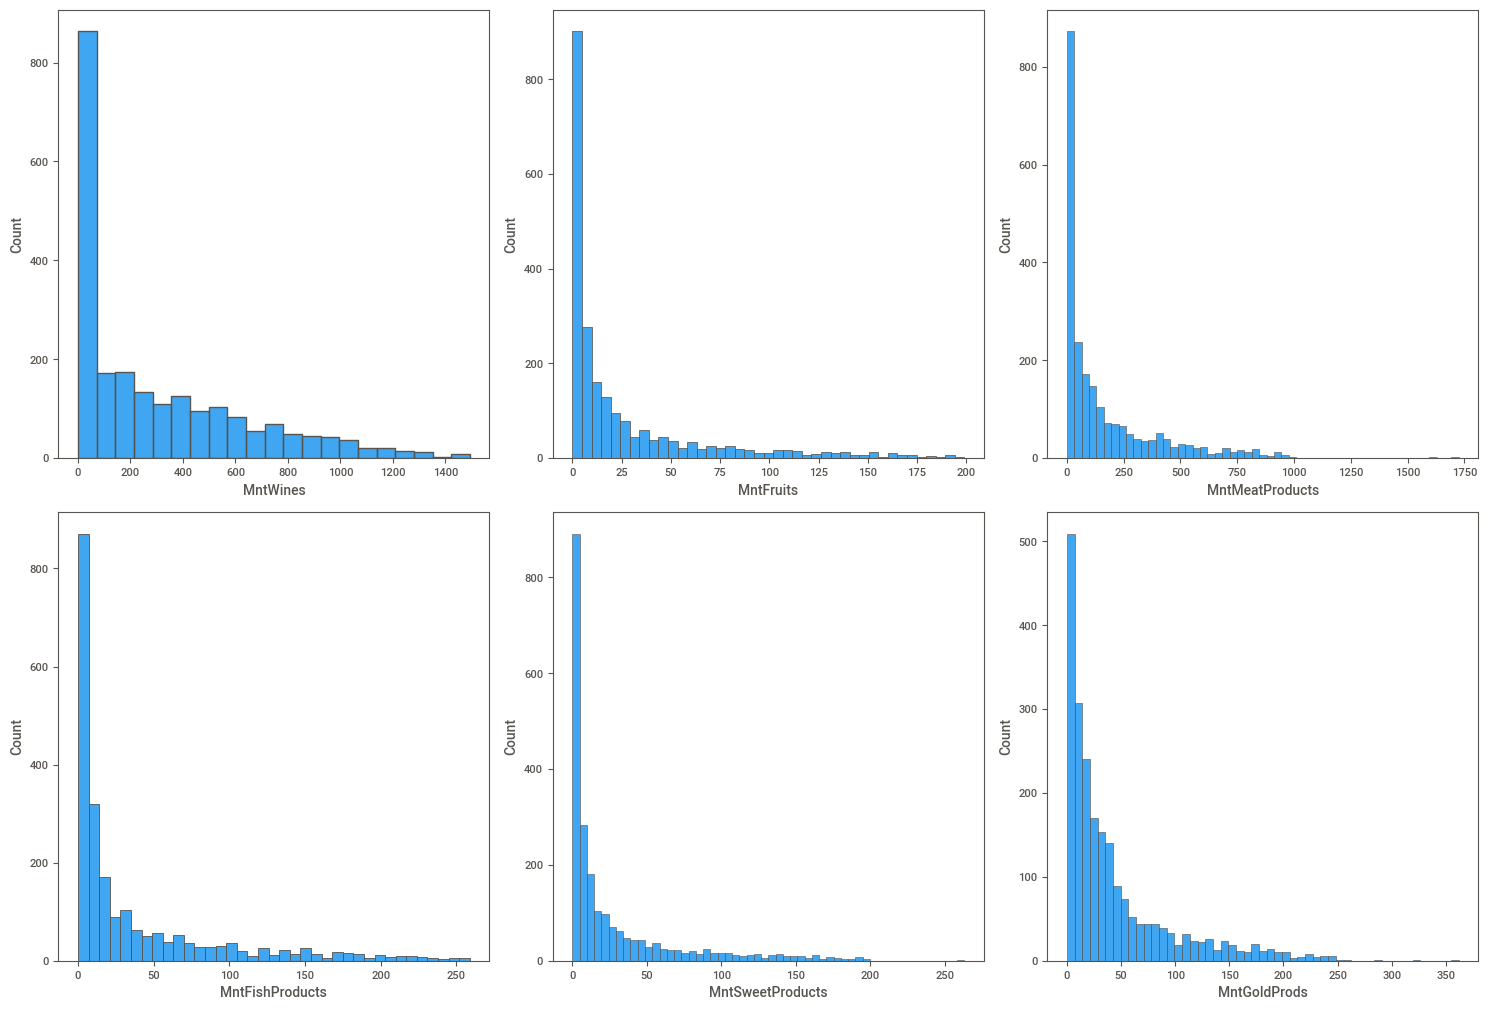

In [ ]:
# Histogram plots of  2 years of product purchases
Product = data_1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
cols = 3
rows = 9

#create df of numeric features only.
num_cols = Product.select_dtypes(exclude='object')

#Size of figure
fig=plt.figure(figsize=(cols*5, rows*5))

#enumerate adds a counter as you
#iterate over each column
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data_1[col], ax = ax)
    
fig.tight_layout()  
plt.show()


Remarks:

* Purchases are skewed towards the left since most are 0

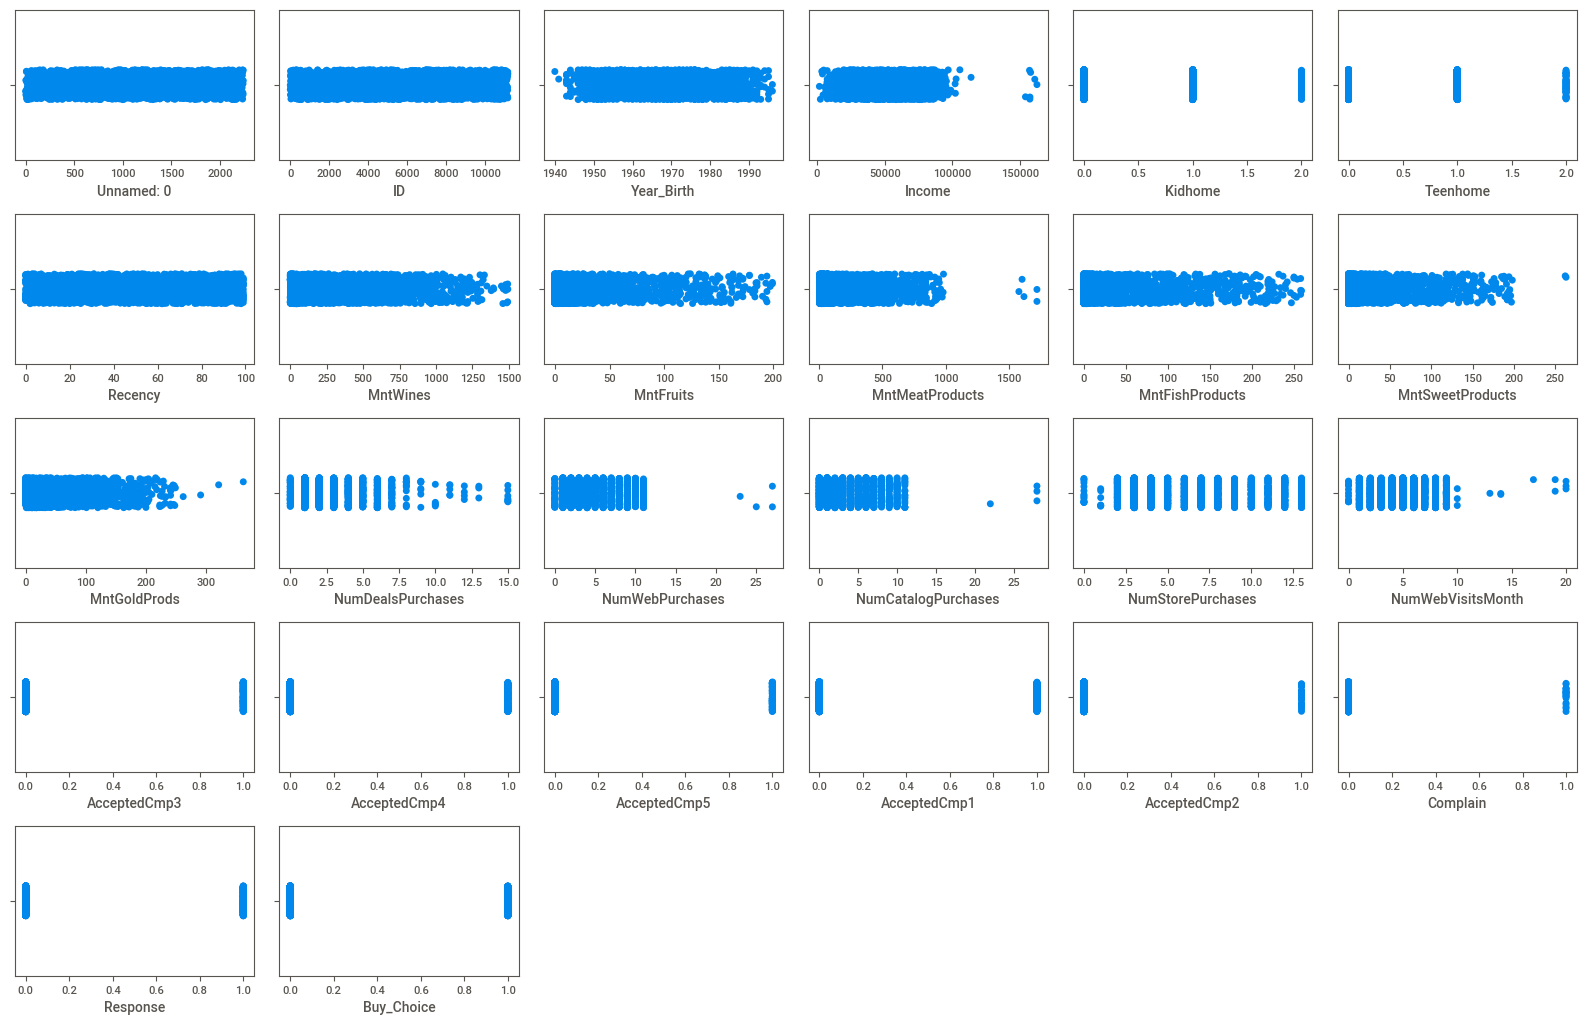

In [ ]:
#Strip Plots for all Numeric Features to check the spread and distribution of the data

cols = 6
rows = 6
num_cols2 = data_1.select_dtypes(exclude='object').columns

fig = plt.figure(figsize= (16,12))

for i, col in enumerate(num_cols2):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.stripplot(x=data_1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

## Unique Values

In [ ]:
# displaying the unique values in each column

for column in data_1.columns:
  print("***************************", column, "********************************")
  print("This column has", data_1[column].nunique(), "unique values, they are shown below:\n")
  print(data_1[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** Unnamed: 0 ********************************
This column has 2240 unique values, they are shown below:

[   0    1    2 ... 2237 2238 2239]
________________________________________________________________________________________________

________________________________________________________________________________________________

*************************** ID ********************************
This column has 2240 unique values, they are shown below:

[5524 2174 4141 ... 7270 8235 9405]
________________________________________________________________________________________________

________________________________________________________________________________________________

*************************** Year_Birth ********************************
This column has 56 unique values, they are shown below:

[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 

## Kurtosis and Skewness

In [ ]:
# obtiaining the skewness and kurtosis of the numerical columns
num_cols = ['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntFruits', 'Income',
       'MntGoldProds', 'NumDealsPurchases', 'NumStorePurchases']

for column in num_cols:
  print("\n\n")
  print(column, "skewnes is: "+ str(round(data_1[column].skew(),2)))
  print(column, "Kurtosis is: "+ str(round(data_1[column].kurt(),2)))
  print(column + ', std: '+ str(round(data_1[column].std(),2)))
  print(column + ', var: '+ str(round(data_1[column].var(),2)))




MntMeatProducts skewnes is: 2.08
MntMeatProducts Kurtosis is: 5.52
MntMeatProducts, std: 225.72
MntMeatProducts, var: 50947.43



MntFishProducts skewnes is: 1.92
MntFishProducts Kurtosis is: 3.1
MntFishProducts, std: 54.63
MntFishProducts, var: 2984.33



MntSweetProducts skewnes is: 2.14
MntSweetProducts Kurtosis is: 4.38
MntSweetProducts, std: 41.28
MntSweetProducts, var: 1704.08



MntFruits skewnes is: 2.1
MntFruits Kurtosis is: 4.05
MntFruits, std: 39.77
MntFruits, var: 1581.93



Income skewnes is: 0.35
Income Kurtosis is: 0.76
Income, std: 21405.89
Income, var: 458212289.89



MntGoldProds skewnes is: 1.89
MntGoldProds Kurtosis is: 3.55
MntGoldProds, std: 52.17
MntGoldProds, var: 2721.44



NumDealsPurchases skewnes is: 2.42
NumDealsPurchases Kurtosis is: 8.94
NumDealsPurchases, std: 1.93
NumDealsPurchases, var: 3.73



NumStorePurchases skewnes is: 0.7
NumStorePurchases Kurtosis is: -0.62
NumStorePurchases, std: 3.25
NumStorePurchases, var: 10.57


## Correlation

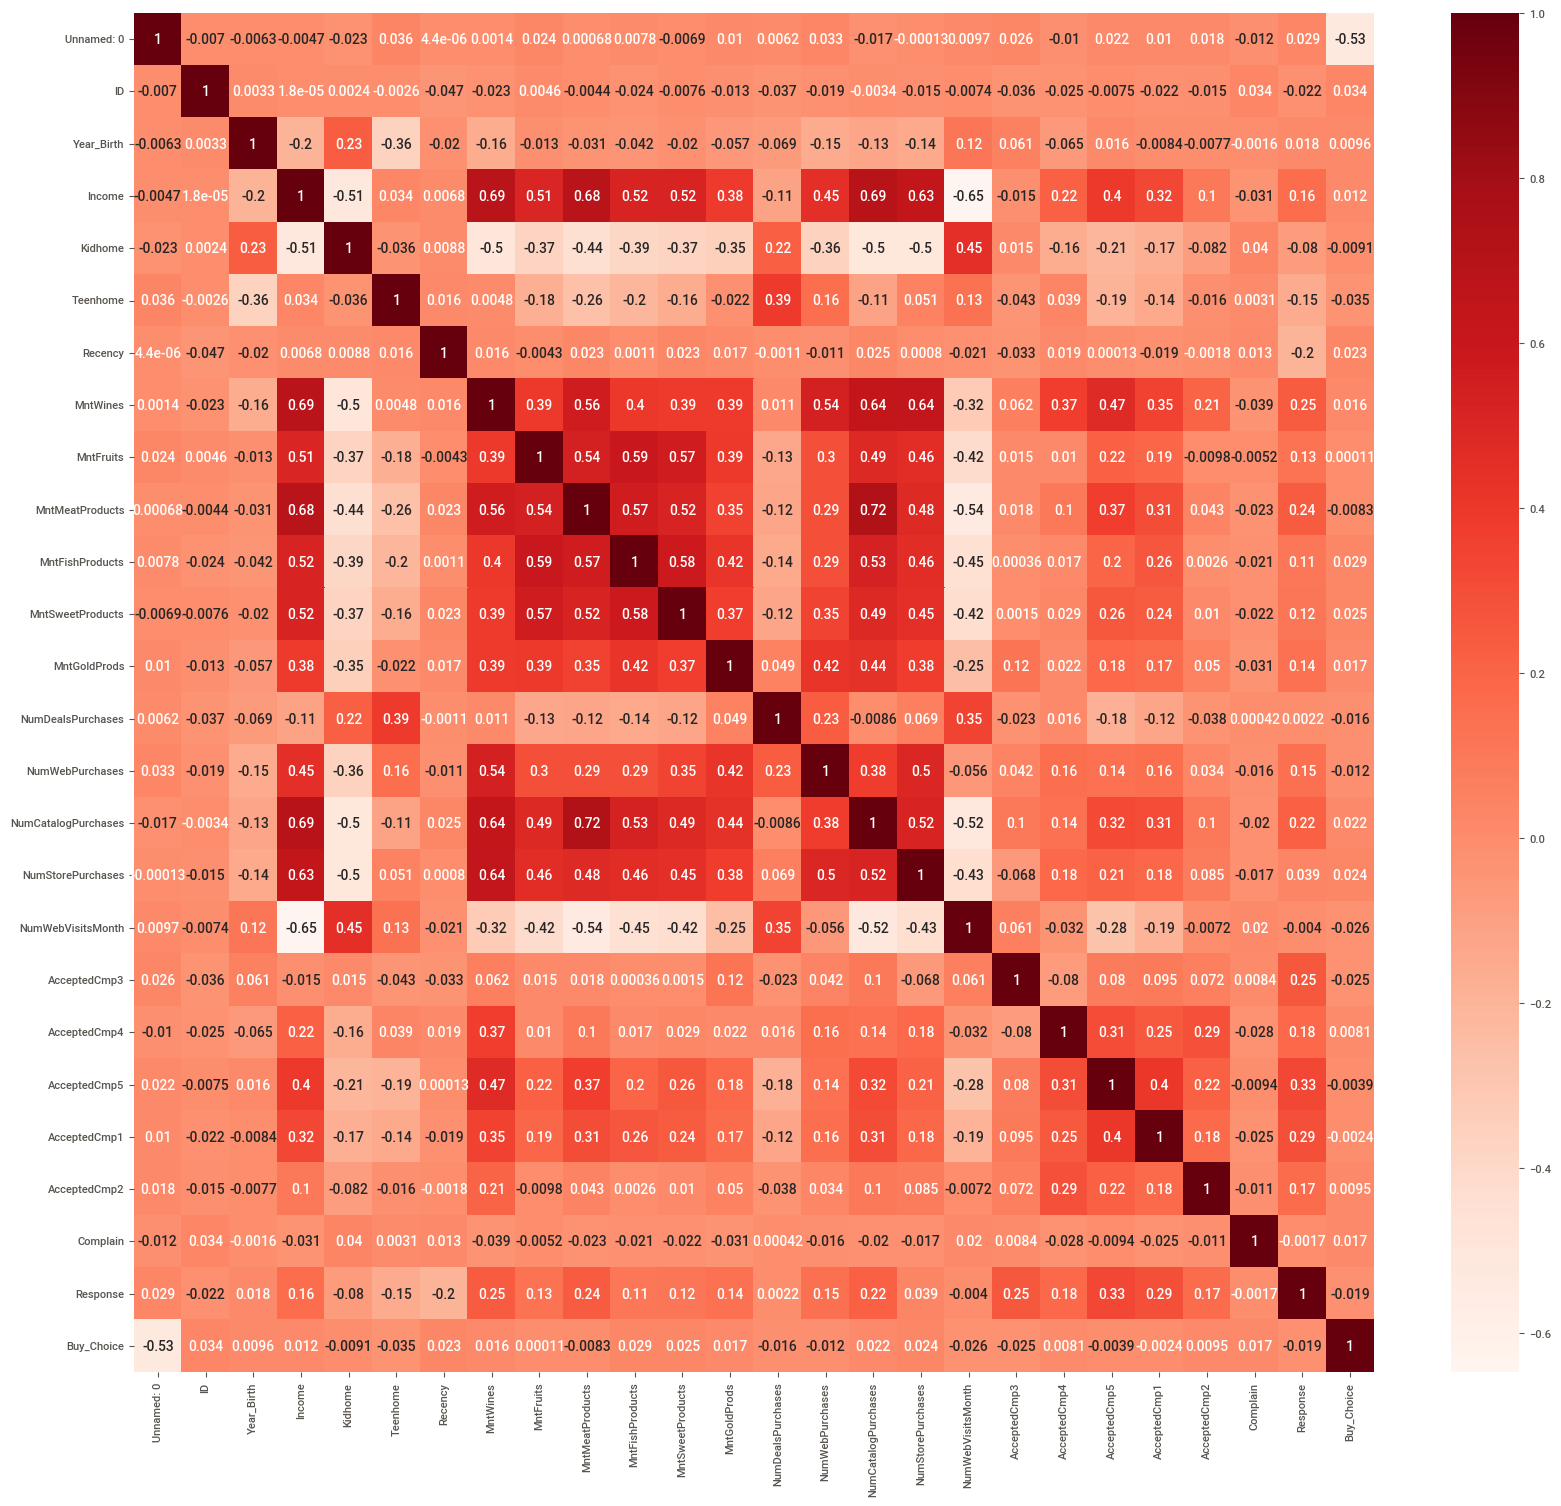

In [ ]:
# Plotting a Heat map
plt.figure(figsize=(20,18))                      # creating a plot figure
cor = data_1.corr()                                # compute correlation
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)   # plot heatmap
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Buy_Choice"])

print(cor_target)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Unnamed: 0             0.526613
ID                     0.033755
Year_Birth             0.009633
Income                 0.011815
Kidhome                0.009061
Teenhome               0.035263
Recency                0.022745
MntWines               0.016437
MntFruits              0.000109
MntMeatProducts        0.008310
MntFishProducts        0.028598
MntSweetProducts       0.025500
MntGoldProds           0.017097
NumDealsPurchases      0.016239
NumWebPurchases        0.012082
NumCatalogPurchases    0.022119
NumStorePurchases      0.023859
NumWebVisitsMonth      0.025560
AcceptedCmp3           0.025010
AcceptedCmp4           0.008066
AcceptedCmp5           0.003900
AcceptedCmp1           0.002369
AcceptedCmp2           0.009548
Complain               0.016507
Response               0.018893
Buy_Choice             1.000000
Name: Buy_Choice, dtype: float64


Unnamed: 0    0.526613
Buy_Choice    1.000000
Name: Buy_Choice, dtype: float64

* Target attribute Buy_Choice has very weak positive correlation with other attributed in the dataset therefore we cannot outrightly ommit any attributes based on this correlation

#MODELLING

## Linear Regression - Baseline

> This model is a Multiple Linear Regression model and it's scores will be a benchmark for the other models we create.

In [ ]:
#conversion of datatype and dropping of variables
data_1 = data_1.drop('Dt_Customer', axis= 1)
data_1['Income'] = data_1['Income'].convert_dtypes()
data_1['Income'] = data_1['Income'].astype('int64')

In [ ]:
#initializing an object of class LabelEncoder
labelencoder= LabelEncoder() 

#fitting and transforming the desired categorical column.
data_1['Education'] = labelencoder.fit_transform(data_1['Education']) 

#fitting and transforming the column
data_1['Marital_Status'] = labelencoder.fit_transform(data_1['Marital_Status'])

In [ ]:
# standardizing our variables before fitting our model
object = StandardScaler()
object.fit_transform(data_1) 
 #independent variable columns
X = data_1.iloc[:,2:25] 
#target variable column 
y = data_1.iloc[:,-1]    

In [ ]:
# setting the x and y variables
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression
X = data_1.drop(['Buy_Choice'], axis=1).values
y = data_1['Buy_Choice'].values

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting our logistic regression  model to our train sets 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
#using our model to make predictions
y_pred = LogReg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[202,  51],
       [ 74, 121]])

* Our model accurately placed 202  and 121 true negatives and true positives. It however still finished with 74 false positives and 51 false negatives

In [ ]:
# import required libraries
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
print(round(accuracy_score(y_test, y_pred),2)*100)
LRA = (cross_val_score(LogReg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

72.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


> The baseline logistic regression model has 72% accuracy in output prediction.








In [ ]:
# comparison of the actual and predicted variables

y_predict = LogReg.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,448.000000,448.000000
mean,0.435268,0.383929
std,0.496346,0.486885
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


## Feature Importance

The feature importance attribute of the model can be used to obtain the feature importance of each feature in your dataset. Feature importance assigns a score to each of your data’s features; the higher the score, the more important or relevant the feature is to your output variable. We will use Extra Tree Classifier in the below example to extract the top 10 features for the dataset because Feature Importance is an inbuilt class that comes with Tree-Based Classifiers.

[0.06409588 0.0434309  0.05553495 0.06501445 0.02526258 0.01988537
 0.06363006 0.06243002 0.05965986 0.06302231 0.06008759 0.06116337
 0.0635313  0.04707075 0.05304211 0.04465314 0.0529797  0.05436048
 0.00920769 0.01169018 0.00818074 0.00907386 0.00299273]


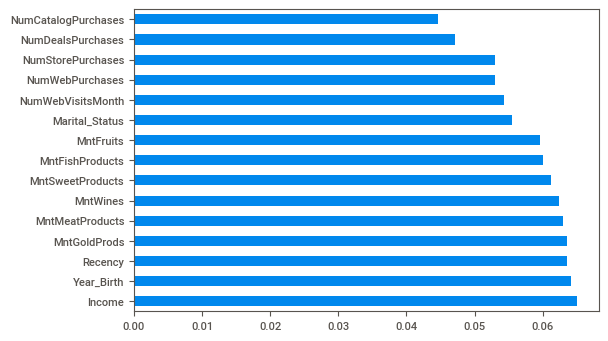

In [ ]:
X = data_1.iloc[:,2:25]  #independent variable columns
y = data_1.iloc[:,-1]    #target variable column (price range)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
 
#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Loop over columns, assign every column to the target variable and compute the feature scores each run.
The scores of the top variables are displayed in a horizontal bar cha

## Feature Selection

Univariate Selection using Chi Square selecting K-Best.
The objective of feature selection is to select a few features and still achieve similar accuracy to make the model easier to interpret and reduce the requirments to run the model.
We applied the Chi-square measure to select the 10 best features to use to train the model.The model measures the degree of association between the target variable and the other variables individually to return the 10 features with the highest degree of association. 


In [ ]:
#extracting top 10 best features by applying SelectKBest class
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #printing 10 best features


                  Specs        Score
3                Income  2756.168162
7              MntWines   225.506981
10      MntFishProducts   145.630531
11     MntSweetProducts    91.672441
9       MntMeatProducts    47.184546
12         MntGoldProds    40.461480
6               Recency    19.784530
15  NumCatalogPurchases     3.516034
16    NumStorePurchases     2.326440
5              Teenhome     1.630740
17    NumWebVisitsMonth     1.620144
18         AcceptedCmp3     1.299173
13    NumDealsPurchases     0.948093
14      NumWebPurchases     0.617827
22         AcceptedCmp2     0.201460


The Chi-square selection outputs the selected features with their scores.
The features were then selected for the models to test the change in accuracy.

In [ ]:
# print(X)

from sklearn.preprocessing import KBinsDiscretizer


# create the discretizer object with strategy quantile and 8 bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans') 

# fit the discretizer to the train set
discretizer.fit(X)

# apply the discretisation
X_cluster = discretizer.transform(X)

X_cluster = pd.DataFrame(data=X_cluster)

print()
print(X_cluster)


       0    1    2    3    4    5    6    7    8    9   ...   13   14   15  \
0     1.0  2.0  2.0  2.0  0.0  0.0  2.0  2.0  2.0  2.0  ...  1.0  2.0  2.0   
1     0.0  2.0  2.0  1.0  2.0  2.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     2.0  2.0  3.0  3.0  0.0  0.0  1.0  2.0  1.0  1.0  ...  0.0  2.0  0.0   
3     4.0  2.0  3.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
4     3.0  4.0  2.0  2.0  2.0  0.0  4.0  1.0  1.0  0.0  ...  1.0  2.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2235  2.0  2.0  2.0  2.0  0.0  2.0  2.0  3.0  1.0  1.0  ...  0.0  3.0  0.0   
2236  0.0  4.0  3.0  2.0  3.0  2.0  2.0  2.0  0.0  0.0  ...  2.0  2.0  0.0   
2237  3.0  2.0  1.0  2.0  0.0  0.0  4.0  3.0  1.0  1.0  ...  0.0  1.0  0.0   
2238  1.0  3.0  3.0  2.0  0.0  2.0  0.0  2.0  1.0  1.0  ...  0.0  2.0  1.0   
2239  0.0  4.0  2.0  2.0  2.0  2.0  2.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   

       16   17   18   19   20   21   22  
0     1.0  1.0  0.0 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:219: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:219: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins

## Logistic Regression

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
data_2 = data_1.drop(columns = ['ID', 
                                'Year_Birth', 
                                'Education', 
                                #'Marital_Status', 
                                #'Income', 
                                'Kidhome',                      
       #'Teenhome', 
       #'Recency', 
       #'MntWines', 
       #'MntFruits', 
       #'MntMeatProducts',
       #'MntFishProducts', 
       #'MntSweetProducts', 
       #'MntGoldProds',
       #'NumDealsPurchases', 
       #'NumWebPurchases', 
       #'NumCatalogPurchases',
       #'NumStorePurchases', 
       #'NumWebVisitsMonth', 
       #'AcceptedCmp3',
       'AcceptedCmp4', 
       'AcceptedCmp5', 
       'AcceptedCmp1', 
       #'AcceptedCmp2',
       'Complain', 
       'Response', 
       #'Buy_Choice', 
       ])
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           2240 non-null   int64
 1   Marital_Status       2240 non-null   int64
 2   Income               2240 non-null   int64
 3   Teenhome             2240 non-null   int64
 4   Recency              2240 non-null   int64
 5   MntWines             2240 non-null   int64
 6   MntFruits            2240 non-null   int64
 7   MntMeatProducts      2240 non-null   int64
 8   MntFishProducts      2240 non-null   int64
 9   MntSweetProducts     2240 non-null   int64
 10  MntGoldProds         2240 non-null   int64
 11  NumDealsPurchases    2240 non-null   int64
 12  NumWebPurchases      2240 non-null   int64
 13  NumCatalogPurchases  2240 non-null   int64
 14  NumStorePurchases    2240 non-null   int64
 15  NumWebVisitsMonth    2240 non-null   int64
 16  AcceptedCmp3         224

In [ ]:
# setting the x and y variables
X = data_2.drop(['Buy_Choice'], axis=1).values
y = data_2['Buy_Choice'].values

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fitting our logistic regression  model to our train sets
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
#using our model to make predictions
y_pred = LogReg.predict(X_test)
# Evaluating the model
#
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[212,  41],
       [ 80, 115]])

> Our logistic regression model using the selected features accurately placed 212  and 115 true negatives and true positives. It however still finished with 41 false positives and 80 false negatives

In [ ]:
y_predict = LogReg.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,448.000000,448.000000
mean,0.435268,0.348214
std,0.496346,0.476937
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
print(round(accuracy_score(y_test, y_pred),2)*100)
LRA1 = (cross_val_score(LogReg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

73.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


> The accuracy from the baseline model has improved to 73% against the 72% baseline.

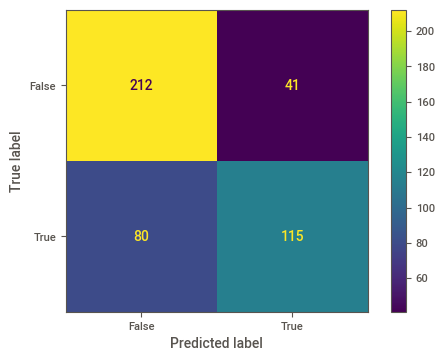

In [ ]:
# Evaluating the model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## SVM

* Support Vector Machine is a supervice machine learning algorithm tha can be used bor noth classification and regression. 

* SVM plot each data item as a point in n-dimensional space , n is the number of features we have, with a value of each feature being the value of a particular cordinate. Classification is done by finding the hyper-plane that differentiates the two classes very well.

* Pros:

> * It works really well with a clear margin of separation

> * It is effective in high dimensional spaces.

> * It is effective in cases where the number of dimensions is greater than the number of samples.

> * It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Cons:
>*  It doesn’t perform well when we have large data set because the required training time is higher
> * It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
> *SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

In [ ]:
# Import the required libraries.
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection

* SVM uses a set of mathematical functions defined as the kernel. The ernel takes data as input and transform it into the required form. 
* We have different types of kernels
> * Linear, nonlinear, polynomial, radial basis function and sigmoid. RBF is the most used because it has localized and finite response along the x-axis.

In [ ]:
# We build our model and fit our data to a sigmoid 
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
# Make predictions using our model
svcpred = svc.predict(X_test)

In [ ]:
# Use k-fold 10 fold split to validate performance of our model.
#splitting our data to different subsets so that our model can train better.
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# Access the accuracy of our model.
kfold = model_selection.KFold(n_splits=10)
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

51.0


* We achieved 51% accuracy using sigmoid, this means our model is not performing as desired, we will fit our data using a different kernel and assess if our accuracy improves. 

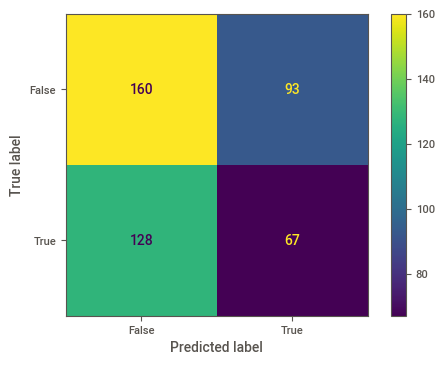

In [ ]:
# Use confusion matrix to access/ visualize how our model classified or performed.
confusion_matrix = metrics.confusion_matrix(y_test, svcpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Our model managed to correctly classify 67 true positives( predicted values predited as actual positive) and 160 true negatives( predicted values correctly as an actual negative), as seen in the accuracy score, the model performance is poor. The model is struggling in identifying customers who buy or not buy a phone.

SVM ~ RBF Kernel

56.00000000000001


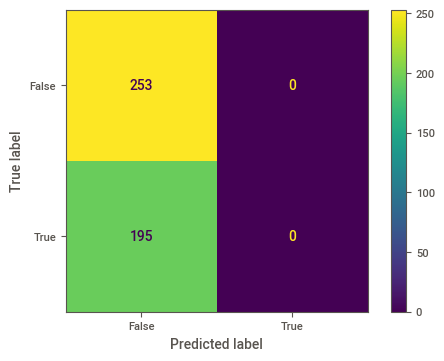

In [ ]:
# We build our model and fit our data to a rbf
svc= SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
# Make predictions using our model
svcpred = svc.predict(X_test)
# Access the accuracy of our model.
kfold = model_selection.KFold(n_splits=10)
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
# Use confusion matrix to access/ visualize how our model classified or performed.
confusion_matrix = metrics.confusion_matrix(y_test, svcpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

* We achieved 56% accuracy using rbf kernel, it is an improvement from the sigmoid model however it is still below the baseline. The model predicted 253 true negatives and 195 false negatives

## Decision Tree Classifier

* Decision tree is a supervised learning technique that can be used both for classification and regression. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

* In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node. This is continuous until ir reaches the leaf node of the tree

In [ ]:
# import decision tree library
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
# fit our data to our model
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

In [ ]:
#Access the accuracy of our model
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

65.0


Our model achieved 65% accuracy, this is an improvement from the SVM model. The model performance is okay. 

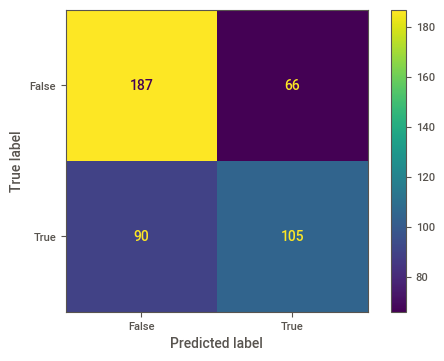

In [ ]:
# Visualize model performance using a confusion matrix to access recall and precision
confusion_matrix = metrics.confusion_matrix(y_test, dtreepred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

> It is evident the model performance improved compared to SVM model, the model however still struggle in identifying true positives and true negatives. The model correctly predicts 105 and 187 true positive and true negative values respectively, it however still identified 66 false positives and 90 false negatives.

## Random Forest

* Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

In [ ]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
#fit data to to our model
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

In [ ]:
# access the accuracy of our model
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

72.0


Our model using random forest achieved 72% accuracy, the model perfomed better than SVM and decision tree. It is equivalent to our baseline model but lower than the logistic regression model. 

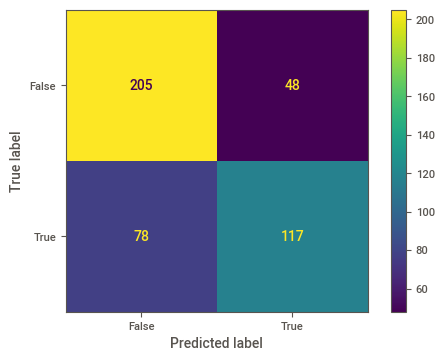

In [ ]:
# Evaluating the model using confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, rfcpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

> Our random forest model accurately placed 205 and 117 true negatives and true positives. It however still finished with 48 false positives and 78 false negatives.

## K-Nearest

* The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In [ ]:
#import knearest classifier.
from sklearn.neighbors import KNeighborsClassifier
# Build the model
knn = KNeighborsClassifier(n_neighbors=22)
#fit the data to our model
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

In [ ]:
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

65.0


Our model acheived 65% accuracy, this is low compared to random forest classifier

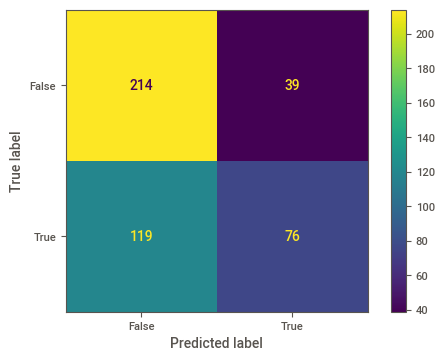

In [ ]:
# Evaluating the model
confusion_matrix = metrics.confusion_matrix(y_test, knnpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

> Our K-nearest model accurately placed 76 and 215 true positives and true negatives. It however still finished with 39 false positives and 119 false negatives.

#Conclusion

* We can conclude that our baseline model did well, our metrics of success was met in  one model , which achieved 72% accuracy. 

* Feature selection did not improve the accuracy of our model by much, only logistic regression showed an improvement by 1% to 73%. Random Forest was equivalent to the baseline while the rest were below. We can attribute this to the size of training data, for the model to learn customer purchase behaviour, it would need big data. 


## Challenging the Model

To challenge the model we used an ensemble averaging method. The method consists of building multiple models independently and returning the average of the prediction of all the models. In general, the combined output is better than an individual output because variance is reduced.

In the below example, three regression models (linear regression, xgboost, and random forest) are trained and their predictions are averaged. The final prediction output is pred_final.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X = data_2.drop(['Buy_Choice'], axis=1)
y = data_2['Buy_Choice']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))


[08:05:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.18074338861573588


The MSE of the ensemble is 0.18, indicating the ensemble of our techniques has an accuracy of our 82%. Our model output individually at 72% is deemed to be satisfactory given the dataset we have.

#Recommendation

* The retailer should target customers with high income with high purchase frequency, these Customers are more likely to buy than the others.

* The campaigns done before did not have much impact, however , those targeted in subsequent campaigns are likely to purchase.

* New clients and those that recently purchased are likely to buy.